In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('MBE_WBE_Matches_in_GBH_Data.csv')
df = df.drop(['LEGEND', 'Unnamed: 2'], axis=1)

df_contractors = df['Contractors']
df_contractors.columns = ['GeneralContractor']
df_sub = df['Sub-Contractors']
df_sub.columns = ['SubContractor']

In [3]:
def cleaner(dirty_list):
    """
    takes in a list of strings and cleans those by removing special characters
    and trimming excess whitespace
    to get rid of potential duplicates
    """
    spec_chars = ["!",'"',"#","%","&","'","(",")", "*","+",",",
                  "-",".","/",":",";","<", "=",">","?","@","[",
                  "\\","]","^","_", "`","{","|","}","~","–", 
                  "\xc2", "\xa0", "\x80", "\x9c", "\x99", "\x94", 
                  "\xad", "\xe2", "\x9d", "\n"]
    for i in range(len(dirty_list)):
        for char in spec_chars:
            dirty_list[i] = dirty_list[i].replace(char, ' ')
            dirty_list[i] = dirty_list[i].strip()
            dirty_list[i] = dirty_list[i].split()
            dirty_list[i] = ' '.join(dirty_list[i])
    return dirty_list

In [4]:
data = pd.read_csv('Copy_of_wgbh.csv', index_col='DateEntered', parse_dates=True)

# convert index to yearly DateTime object
data.index = data.index.to_period('Y')

# drop everything but race, sub-contractor columns
data_sub = data.drop(['Agency', 'ProjectName', 'ProjectAddress_1',
       'GeneralContractor', 'Developer', 'SubContractorAddress_1',
       'SubContractorAddress_2', 'Trade', 'MINOR'], axis=1)

data_contractors = data.drop(['Agency', 'ProjectName', 'ProjectAddress_1',
       'SubContractor', 'Developer', 'SubContractorAddress_1',
       'SubContractorAddress_2', 'Trade', 'MINOR'], axis=1)

In [5]:
data_sub = data_sub.drop(['SEX', 'RESIDENT'], axis=1)
data_contractors = data_contractors.drop(['SEX', 'RESIDENT'], axis=1)

cleaned_subs = cleaner(data_sub['SubContractor'].to_list())
data_sub['SubContractor'] = cleaned_subs

cleaned_contractors = cleaner(data_contractors['GeneralContractor'].to_list())
data_contractors['GeneralContractor'] = cleaned_contractors

In [6]:
data_sub

,SubContractor,Race_Desc,TotalHours
DateEntered,,,
2025,KAPILOFF S GLASS INC,CAUCASIAN,0.0
2021,NORTH EAST ENERGY CONTROL,CAUCASIAN,0.0
2021,J R J CONSTRUCTION CO,CAUCASIAN,0.0
2021,RICMOR CONSTRUCTION INC,CAUCASIAN,0.0
2021,BACK BAY CONCRETE,CAUCASIAN,0.0
...,...,...,...
2016,LYNNWELL ASSOCIATES INC,BLACK,32.0
2016,LYNNWELL ASSOCIATES INC,HISPANIC,40.0
2016,LYNNWELL ASSOCIATES INC,CAUCASIAN,296.0


In [7]:
summary_subs = pd.DataFrame(columns=['SubContractor', 'CAUCASIAN', 'BLACK', 'HISPANIC', 'ASIAN', 'OTHER', 'Total'])
subs = data_sub['SubContractor'].unique()
print('Beginning Grouping')
groups = data_sub.groupby(data_sub.SubContractor)
print('Done Grouping By SubContractor')

# compute percentage of employees for each developer by race
for i in range(len(subs)):
    temp = groups.get_group(subs[i])
    filt1 = temp['Race_Desc'] == 'CAUCASIAN'
    filt2 = temp['Race_Desc'] == 'BLACK'
    filt3 = temp['Race_Desc'] == 'ASIAN'
    filt4 = temp['Race_Desc'] == 'HISPANIC'
    filt5 = temp['Race_Desc'] == 'OTHER'
    CAUCASIAN = temp[filt1]
    BLACK = temp[filt2]
    ASIAN = temp[filt3]
    HISPANIC = temp[filt4]
    OTHER = temp[filt5]
    CAUCASIAN_hours = CAUCASIAN['TotalHours'].sum() / CAUCASIAN.shape[0]
    BLACK_hours = BLACK['TotalHours'].sum() / BLACK.shape[0]
    ASIAN_hours = ASIAN['TotalHours'].sum() / ASIAN.shape[0]
    HISPANIC_hours = HISPANIC['TotalHours'].sum() / HISPANIC.shape[0]
    OTHER_hours = OTHER['TotalHours'].sum() / OTHER.shape[0]
    summary_subs.loc[len(summary_subs.index)] = [subs[i], CAUCASIAN_hours, BLACK_hours, HISPANIC_hours, ASIAN_hours, OTHER_hours, (CAUCASIAN_hours + BLACK_hours + HISPANIC_hours + ASIAN_hours + OTHER_hours)]
    summary_subs = summary_subs.fillna(0)
    summary_subs.loc[len(summary_subs.index) - 1, ['Total']] = summary_subs.loc[len(summary_subs.index) - 1]['ASIAN'] + summary_subs.loc[len(summary_subs.index) - 1]['CAUCASIAN'] + summary_subs.loc[len(summary_subs.index) - 1]['HISPANIC'] + summary_subs.loc[len(summary_subs.index) - 1]['BLACK'] + summary_subs.loc[len(summary_subs.index) - 1]['OTHER']

Beginning Grouping
Done Grouping By SubContractor


<ipython-input-7-bad77c5c110f>:22: RuntimeWarning: invalid value encountered in double_scalars
  ASIAN_hours = ASIAN['TotalHours'].sum() / ASIAN.shape[0]
<ipython-input-7-bad77c5c110f>:23: RuntimeWarning: invalid value encountered in double_scalars
  HISPANIC_hours = HISPANIC['TotalHours'].sum() / HISPANIC.shape[0]
<ipython-input-7-bad77c5c110f>:24: RuntimeWarning: invalid value encountered in double_scalars
  OTHER_hours = OTHER['TotalHours'].sum() / OTHER.shape[0]
<ipython-input-7-bad77c5c110f>:21: RuntimeWarning: invalid value encountered in double_scalars
  BLACK_hours = BLACK['TotalHours'].sum() / BLACK.shape[0]
<ipython-input-7-bad77c5c110f>:20: RuntimeWarning: invalid value encountered in double_scalars
  CAUCASIAN_hours = CAUCASIAN['TotalHours'].sum() / CAUCASIAN.shape[0]


In [8]:
summary_contractors = pd.DataFrame(columns=['GeneralContractor', 'CAUCASIAN', 'BLACK', 'HISPANIC', 'ASIAN', 'OTHER', 'Total'])
contractors = data_contractors['GeneralContractor'].unique()
print('Beginning Grouping')
groups = data_contractors.groupby(data_contractors.GeneralContractor)
print('Done Grouping By GeneralContractor')

# compute percentage of employees for each developer by race
for i in range(len(contractors)):
    temp = groups.get_group(contractors[i])
    filt1 = temp['Race_Desc'] == 'CAUCASIAN'
    filt2 = temp['Race_Desc'] == 'BLACK'
    filt3 = temp['Race_Desc'] == 'ASIAN'
    filt4 = temp['Race_Desc'] == 'HISPANIC'
    filt5 = temp['Race_Desc'] == 'OTHER'
    CAUCASIAN = temp[filt1]
    BLACK = temp[filt2]
    ASIAN = temp[filt3]
    HISPANIC = temp[filt4]
    OTHER = temp[filt5]
    CAUCASIAN_hours = CAUCASIAN['TotalHours'].sum() / CAUCASIAN.shape[0]
    BLACK_hours = BLACK['TotalHours'].sum() / BLACK.shape[0]
    ASIAN_hours = ASIAN['TotalHours'].sum() / ASIAN.shape[0]
    HISPANIC_hours = HISPANIC['TotalHours'].sum() / HISPANIC.shape[0]
    OTHER_hours = OTHER['TotalHours'].sum() / OTHER.shape[0]
    summary_contractors.loc[len(summary_contractors.index)] = [contractors[i], CAUCASIAN_hours, BLACK_hours, HISPANIC_hours, ASIAN_hours, OTHER_hours, (CAUCASIAN_hours + BLACK_hours + HISPANIC_hours + ASIAN_hours + OTHER_hours)]
    summary_contractors = summary_contractors.fillna(0)
    summary_contractors.loc[len(summary_contractors.index) - 1, ['Total']] = summary_contractors.loc[len(summary_contractors.index) - 1]['ASIAN'] + summary_contractors.loc[len(summary_contractors.index) - 1]['CAUCASIAN'] + summary_contractors.loc[len(summary_contractors.index) - 1]['HISPANIC'] + summary_contractors.loc[len(summary_contractors.index) - 1]['BLACK'] + summary_contractors.loc[len(summary_contractors.index) - 1]['OTHER']

Beginning Grouping
Done Grouping By GeneralContractor


<ipython-input-8-ec54358a1e88>:22: RuntimeWarning: invalid value encountered in double_scalars
  ASIAN_hours = ASIAN['TotalHours'].sum() / ASIAN.shape[0]
<ipython-input-8-ec54358a1e88>:24: RuntimeWarning: invalid value encountered in double_scalars
  OTHER_hours = OTHER['TotalHours'].sum() / OTHER.shape[0]
<ipython-input-8-ec54358a1e88>:21: RuntimeWarning: invalid value encountered in double_scalars
  BLACK_hours = BLACK['TotalHours'].sum() / BLACK.shape[0]
<ipython-input-8-ec54358a1e88>:23: RuntimeWarning: invalid value encountered in double_scalars
  HISPANIC_hours = HISPANIC['TotalHours'].sum() / HISPANIC.shape[0]
<ipython-input-8-ec54358a1e88>:20: RuntimeWarning: invalid value encountered in double_scalars
  CAUCASIAN_hours = CAUCASIAN['TotalHours'].sum() / CAUCASIAN.shape[0]


In [9]:
summary_contractors

,GeneralContractor,CAUCASIAN,BLACK,HISPANIC,ASIAN,OTHER,Total
0,COLANTONIO INCORPORATED,25.788227,30.837613,22.350225,31.083333,55.347222,165.406621
1,J J CONTRACTORS INC,27.311261,31.472087,31.653061,30.608696,27.322222,148.367328
2,BOSTON BUILDING BRIDGE,24.501765,31.044396,39.135529,23.593750,27.000000,145.275439
3,BILT RITE CONSTRUCTION,32.921880,41.058428,45.003407,24.645529,32.453571,176.082817
4,JOHN MORIARTY ASSOCIATES,110.849589,55.378514,75.812227,50.517567,41.063030,333.620927
...,...,...,...,...,...,...,...
236,SEQUOIA CONSTRUCTION INC,43.000000,0.000000,16.666667,0.000000,0.000000,59.666667
237,PELLETIER MILLWRIGHTS LLC,61.240000,0.000000,0.000000,0.000000,0.000000,61.240000
238,MORGAN AWNING CO,6.000000,14.000000,0.000000,0.000000,0.000000,20.000000
239,TURNER CONSTRUCTION COMPANY,75.833333,0.000000,31.333333,0.000000,0.000000,107.166667


In [10]:
summary_subs.to_csv('Avg_Hours_Assigned_by_Race_SubContractors.csv')
summary_contractors.to_csv('Avg_Hours_Assigned_by_Race_Contractors.csv')

In [11]:
mbe_subs = df_sub.to_list()
summary_subs_mbe_wbe = summary_subs.loc[summary_subs['SubContractor'].isin(mbe_subs)]

mbe_contractors = df_contractors.to_list()
summary_contractors_mbe_wbe = summary_contractors.loc[summary_contractors['GeneralContractor'].isin(mbe_contractors)]

In [12]:
summary_subs_mbe_wbe.to_csv('Avg_Hours_Assigned_By_Race_MBEorWBE_Subcontractors.csv')
summary_contractors_mbe_wbe.to_csv('Avg_Hours_Assigned_By_Race_MBEorWBE_Contractors.csv')

In [13]:
non_mbe_wbe_subs = summary_subs.loc[~summary_subs['SubContractor'].isin(mbe_subs)]
non_mbe_wbe_contractors = summary_contractors.loc[~summary_contractors['GeneralContractor'].isin(mbe_contractors)]

In [14]:
avg_non_mbe_wbe_contractors = non_mbe_wbe_contractors[['CAUCASIAN', 'BLACK', 'HISPANIC', 'ASIAN', 'OTHER']].sum() / non_mbe_wbe_contractors.shape[0]

In [15]:
avg_non_mbe_wbe_contractors

CAUCASIAN    38.476972
BLACK        21.512340
HISPANIC     32.015722
ASIAN        13.411096
OTHER        12.153211
dtype: float64

In [16]:
avg_non_mbe_wbe_subs = non_mbe_wbe_subs[['CAUCASIAN', 'BLACK', 'HISPANIC', 'ASIAN', 'OTHER']].sum() / non_mbe_wbe_subs.shape[0]

In [17]:
avg_non_mbe_wbe_subs

CAUCASIAN    39.407021
BLACK        19.234545
HISPANIC     30.540036
ASIAN         6.559492
OTHER         5.472101
dtype: float64

In [18]:
avg_mbe_wbe_contractors = summary_contractors_mbe_wbe[['CAUCASIAN', 'BLACK', 'HISPANIC', 'ASIAN', 'OTHER']].sum() / summary_contractors_mbe_wbe.shape[0]
avg_mbe_wbe_contractors

CAUCASIAN    26.882756
BLACK         5.224769
HISPANIC     14.640376
ASIAN         0.000000
OTHER         0.000000
dtype: float64

In [19]:
avg_mbe_wbe_subs = summary_subs_mbe_wbe[['CAUCASIAN', 'BLACK', 'HISPANIC', 'ASIAN', 'OTHER']].sum() / summary_subs_mbe_wbe.shape[0]
avg_mbe_wbe_subs

CAUCASIAN    32.152586
BLACK        28.793540
HISPANIC     30.950277
ASIAN         1.703061
OTHER         7.083922
dtype: float64

<AxesSubplot:ylabel='Hours Assigned'>

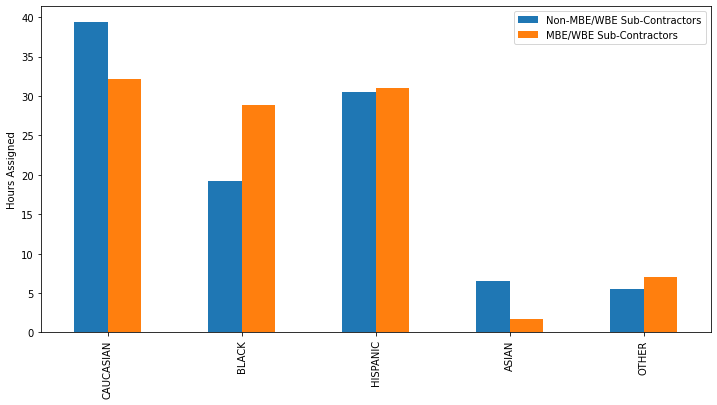

In [20]:
sub_avgs = pd.concat([avg_non_mbe_wbe_subs, avg_mbe_wbe_subs], axis=1)
sub_avgs.columns = ['Non-MBE/WBE Sub-Contractors', 'MBE/WBE Sub-Contractors']
sub_avgs.plot(kind='bar', figsize=(12, 6), ylabel='Hours Assigned')

<AxesSubplot:ylabel='Hours Assigned'>

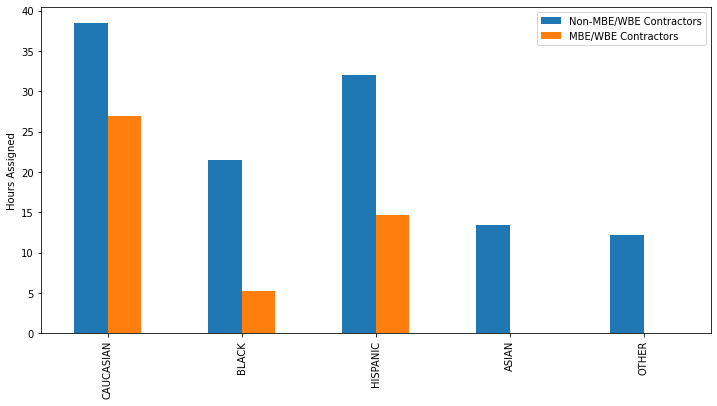

In [21]:
contractor_avgs = pd.concat([avg_non_mbe_wbe_contractors, avg_mbe_wbe_contractors], axis=1)
contractor_avgs.columns = ['Non-MBE/WBE Contractors', 'MBE/WBE Contractors']
contractor_avgs.plot(kind='bar', figsize=(12, 6), ylabel='Hours Assigned')

In [39]:
non_avg, avg = contractor_avgs.sum()
contractor_avgs_pct = contractor_avgs.copy()
for i in range(contractor_avgs_pct.shape[0]):
    contractor_avgs_pct.iloc[i]['Non-MBE/WBE Contractors'] = contractor_avgs_pct.iloc[i]['Non-MBE/WBE Contractors'] / non_avg
    contractor_avgs_pct.iloc[i]['MBE/WBE Contractors'] = contractor_avgs_pct.iloc[i]['MBE/WBE Contractors'] / avg

<AxesSubplot:ylabel='Percentage of Hours Assigned'>

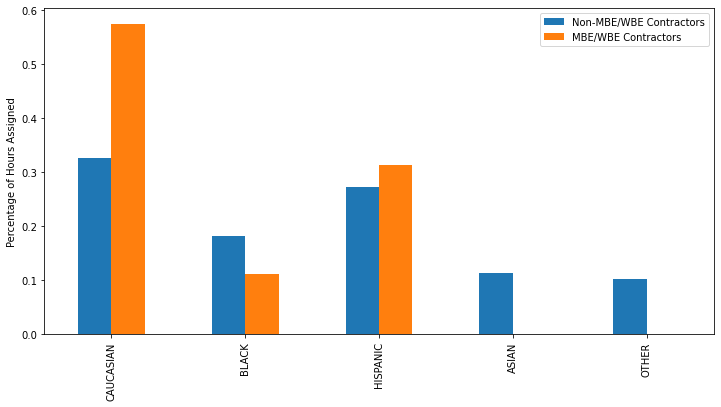

In [42]:
contractor_avgs_pct.plot(kind='bar', figsize=(12, 6), ylabel='Percentage of Hours Assigned')

In [45]:
non_avg_subs, avg_subs = sub_avgs.sum()
subs_avgs_pct = sub_avgs.copy()
for i in range(subs_avgs_pct.shape[0]):
    subs_avgs_pct.iloc[i]['Non-MBE/WBE Sub-Contractors'] = subs_avgs_pct.iloc[i]['Non-MBE/WBE Sub-Contractors'] / non_avg_subs
    subs_avgs_pct.iloc[i]['MBE/WBE Sub-Contractors'] = subs_avgs_pct.iloc[i]['MBE/WBE Sub-Contractors'] / avg_subs

<AxesSubplot:ylabel='Percentage of Hours Assigned'>

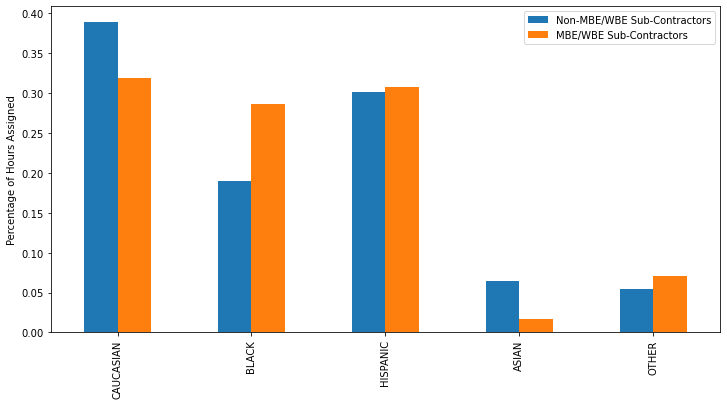

In [46]:
subs_avgs_pct.plot(kind='bar', figsize=(12, 6), ylabel='Percentage of Hours Assigned')